# Milan Kovacs
## 21308128

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold 
from sklearn import cluster 
from sklearn import preprocessing 

# 1) Load the dataset

In [2]:
data_frame = pd.read_csv("./loans_train_prepared.csv")
data = np.array(data_frame.values, dtype=float)
print("(no. of examples, no. of attributes): ", data.shape)

(no. of examples, no. of attributes):  (614, 17)


# 2) Rescale the dataset

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

# 3) Visualize the dataset

In [4]:
colours = np.array(['r', 'b', 'g', 'y', 'c', 'm', 'lime', 'orange', 'pink', 'purple', 
                    'brown', 'gray', 'navy', 'gold', 'teal', 'indigo', 'violet'])

def clustering_scatter_plot(points, labels, centres, title):
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(
            points[labels==i, 0],
            points[labels==i, 1],
            c=colours[i%colours.size],
            label = f'Cluster {i}'
        )
        
    if centres is not None:
        plt.scatter(centres[:,0], centres[:,1], c='r', marker='*', s=500)
        
    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# 4) Apply K-Means clustering

In [5]:
k = 5 # We will try with 5 clusters

clustered_data_skibidi = cluster.KMeans(n_clusters=k, 
                                              n_init=10,
                                              max_iter=300).fit(data)

C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [6]:
data_and_centres = np.r_[data,clustered_data_skibidi.cluster_centers_]


In [7]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centres)
print("Transformation complete")

Transformation complete


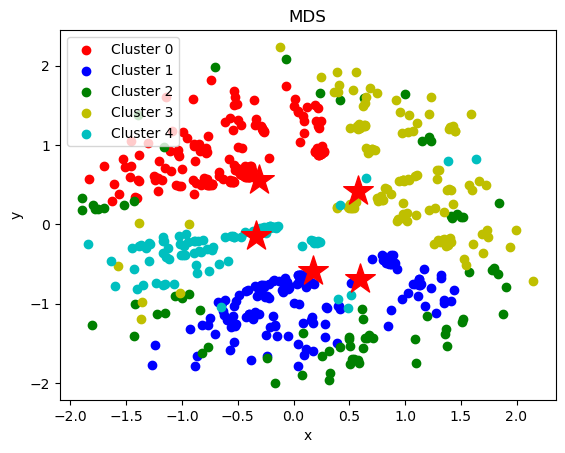

In [8]:
clustering_scatter_plot(
    points=XYcoordinates[:-k,:],
    labels=clustered_data_skibidi.labels_,
    centres=XYcoordinates[-k:,:],
    title='MDS'
)

This graph is not great, we can see a few clusters but the centers are not well defined.

transformation complete


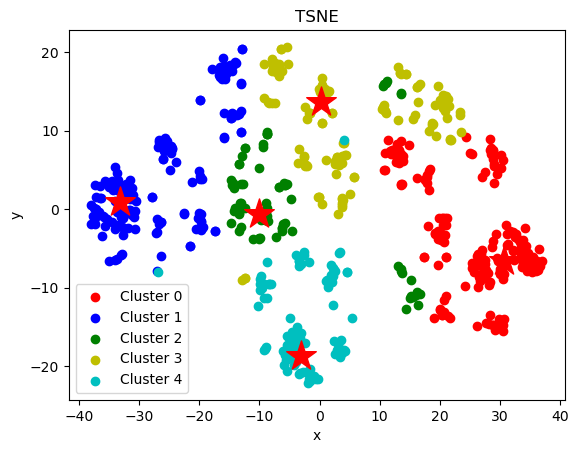

In [9]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centres)
print("transformation complete")

clustering_scatter_plot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_skibidi.labels_,
                       centres=XYcoordinates[-k:,:], 
                       title='TSNE')

This graph is much better, we can see the clusters and centers well-defined. 

# 5) Cluster Analysis

In [10]:
data_frame['cluster'] = pd.Series(clustered_data_skibidi.labels_, index=data_frame.index)

In [11]:
data_frame.head()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.082952,1.056390,0.75,1.0,True,False,False,False,False,False,False,False,True,True,0.841086,1
1,1,0.333333,0.924041,1.045549,0.75,1.0,True,False,True,False,False,False,False,False,False,False,0.871711,4
2,2,0.000000,0.681512,0.633249,0.75,1.0,True,False,True,False,True,False,False,False,True,True,0.385189,1
3,3,0.000000,0.606463,1.000974,0.75,1.0,True,False,True,False,False,False,True,False,True,True,0.717012,1
4,4,0.000000,1.100325,1.113997,0.75,1.0,True,False,False,False,False,False,False,False,True,True,0.860305,1


In [12]:
data_frame.tail()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,609,0.000000,0.664021,0.673577,0.750,1.0,False,False,False,False,False,False,False,False,False,True,0.364708,3
610,610,1.000000,0.856946,0.392461,0.375,1.0,True,False,True,False,False,False,False,False,False,True,0.587496,4
611,611,0.333333,1.312470,1.565057,0.750,1.0,True,False,True,False,False,False,False,False,True,True,1.116075,1
612,612,0.666667,1.266308,1.324336,0.750,1.0,True,False,True,False,False,False,False,False,True,True,1.042256,1
613,613,0.000000,0.924041,1.072433,0.750,0.0,False,False,False,False,True,False,False,True,False,False,0.663523,3


In [13]:
data_frame.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,298.404762,0.265873,0.916212,1.094682,0.722024,0.982143,0.875000,0.011905,0.803571,0.005952,0.130952,0.035714,0.196429,1.000000,0.000000,0.916667,0.887036
1,258.206667,0.275556,0.922598,1.067614,0.688833,0.993333,0.960000,0.013333,0.753333,0.006667,0.106667,0.066667,0.173333,0.000000,1.000000,0.773333,0.874172
2,317.973684,0.289474,0.891312,1.073400,0.718750,0.000000,0.828947,0.039474,0.697368,0.000000,0.144737,0.013158,0.328947,0.263158,0.394737,0.000000,0.842399
3,332.200000,0.096000,0.895323,1.001503,0.735200,0.936000,0.352000,0.032000,0.024000,0.008000,0.136000,0.072000,0.208000,0.360000,0.176000,0.632000,0.771303
4,354.073684,0.340351,0.943096,1.146018,0.703684,0.989474,0.957895,0.021053,0.989474,0.000000,0.168421,0.063158,0.252632,0.000000,0.000000,0.768421,0.937957


We can see the means of the clusters, its not very informative or give us a clear idea given we know we are trying to classify whether someone gets a loan or not. Let's continue with the analysis.

# 6) Elbow Analysis  

Task: 
Plot the sum of squared distances from the data points to the k-Means clusters' centres for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), compute a new k-Means clustering.

C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

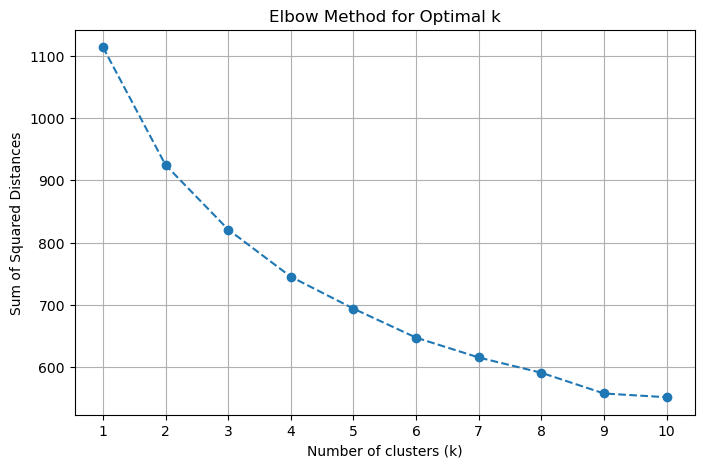

In [14]:
sum_of_square_distances = []  

k_values = range(1, 11)

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data)
    sum_of_square_distances.append(kmeans.inertia_) 

plt.figure(figsize=(8,5))
plt.plot(k_values, sum_of_square_distances, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [15]:
# This suggests the optimal number of clusters is 9

optimal_k = 9


In [16]:
clustered_data_skibidi = cluster.KMeans(n_clusters=optimal_k,
                                              n_init=10,
                                              max_iter=300).fit(data)
data_and_centres = np.r_[data, clustered_data_skibidi.cluster_centers_]

XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centres)
print("Transformation complete")


C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Transformation complete


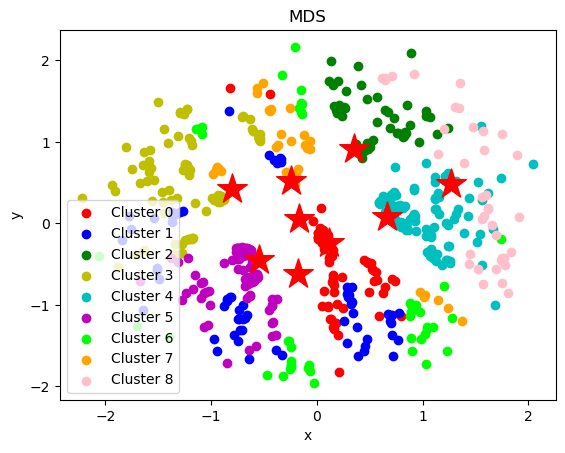

In [17]:
clustering_scatter_plot(
    points=XYcoordinates[:-optimal_k, :],
    labels=clustered_data_skibidi.labels_,
    centres=XYcoordinates[-optimal_k:, :],
    title='MDS'
)

The result of this plot doesn't fully align with our expectation to classify users whether they should get a loan or not.

transformation complete


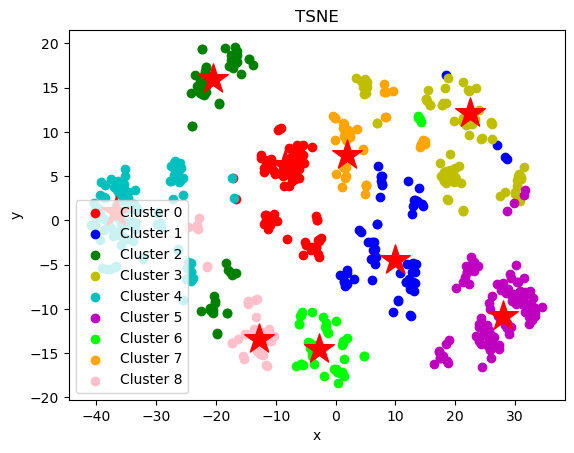

In [18]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centres)
print("transformation complete")

clustering_scatter_plot(points=XYcoordinates[:-optimal_k,:], 
                       labels=clustered_data_skibidi.labels_,
                       centres=XYcoordinates[-optimal_k:,:], 
                       title='TSNE')

This graph is better in the sense that the clusters are divided and their centers are better.

# 7) Silhouette
Implement and plot the results of the Silhouette method for determining the best value of k for k-Means. Compare the results of the Elbow method to the results of the Silhouette method.

C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 2, The average silhouette_score is : 0.16472214860265735
For n_clusters = 3, The average silhouette_score is : 0.17048266229688122
For n_clusters = 4, The average silhouette_score is : 0.15522291036367522
For n_clusters = 5, The average silhouette_score is : 0.18043005035370857


C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

For n_clusters = 6, The average silhouette_score is : 0.1767245233170883
For n_clusters = 7, The average silhouette_score is : 0.18919592857395182
For n_clusters = 8, The average silhouette_score is : 0.18280604127449998
For n_clusters = 9, The average silhouette_score is : 0.1907920922113999


C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 10, The average silhouette_score is : 0.17684955819192175
For n_clusters = 11, The average silhouette_score is : 0.17915469579511994


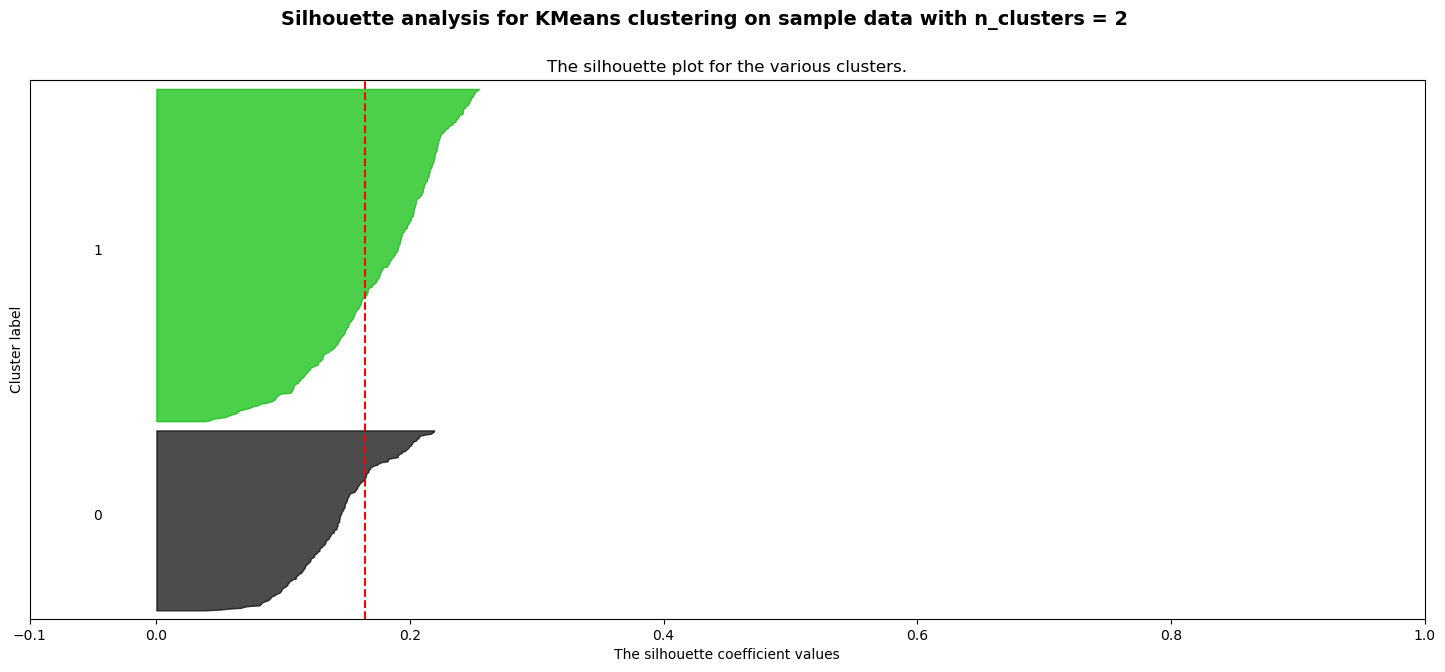

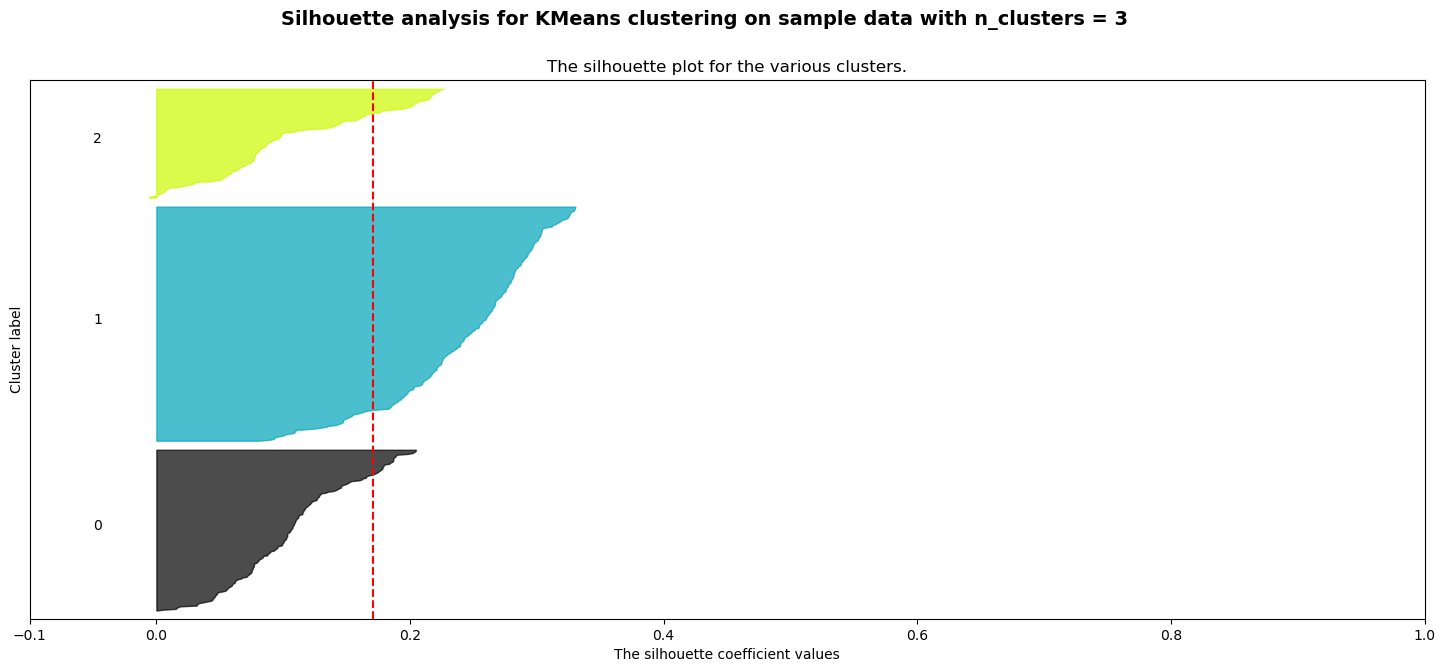

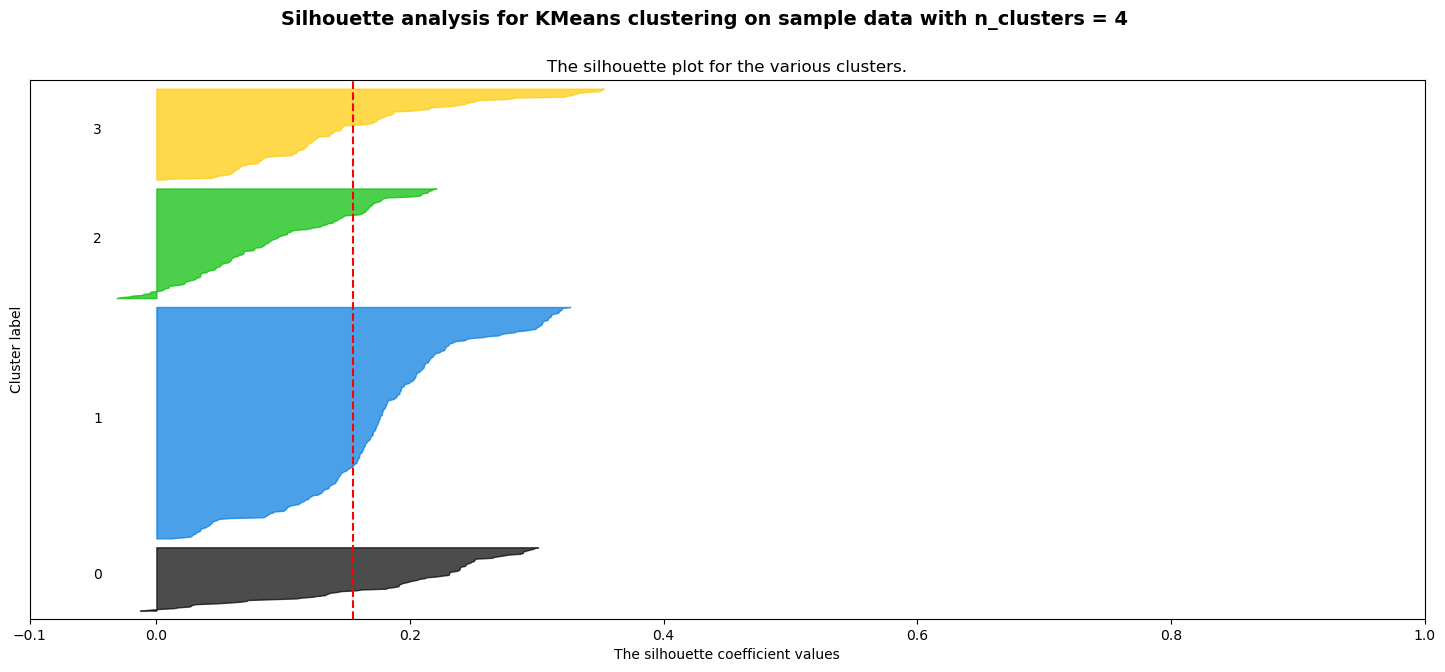

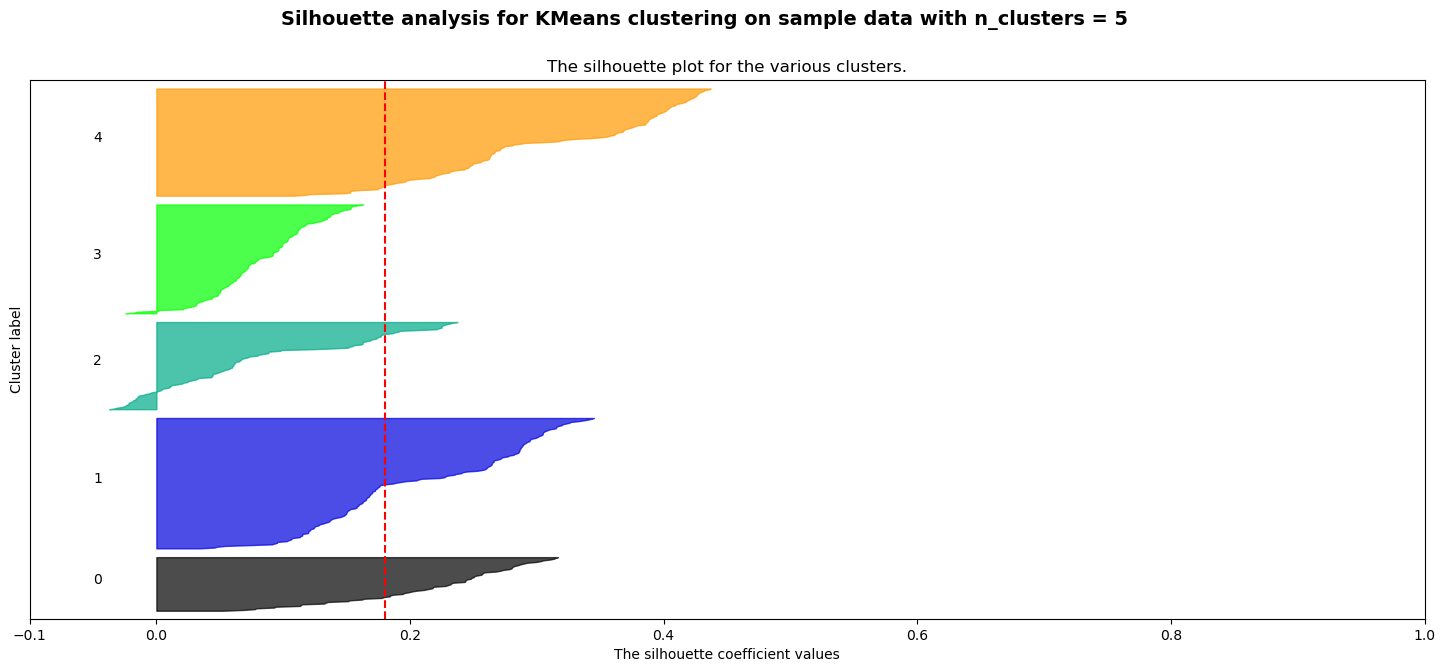

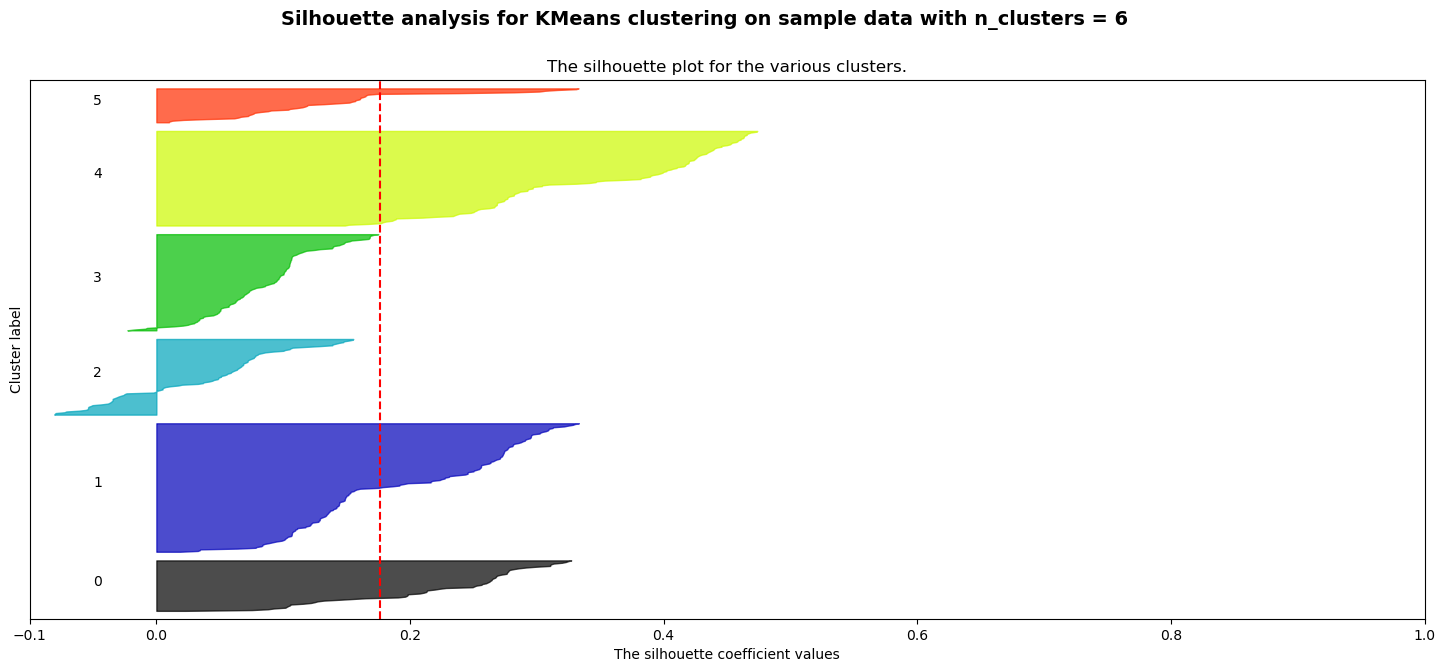

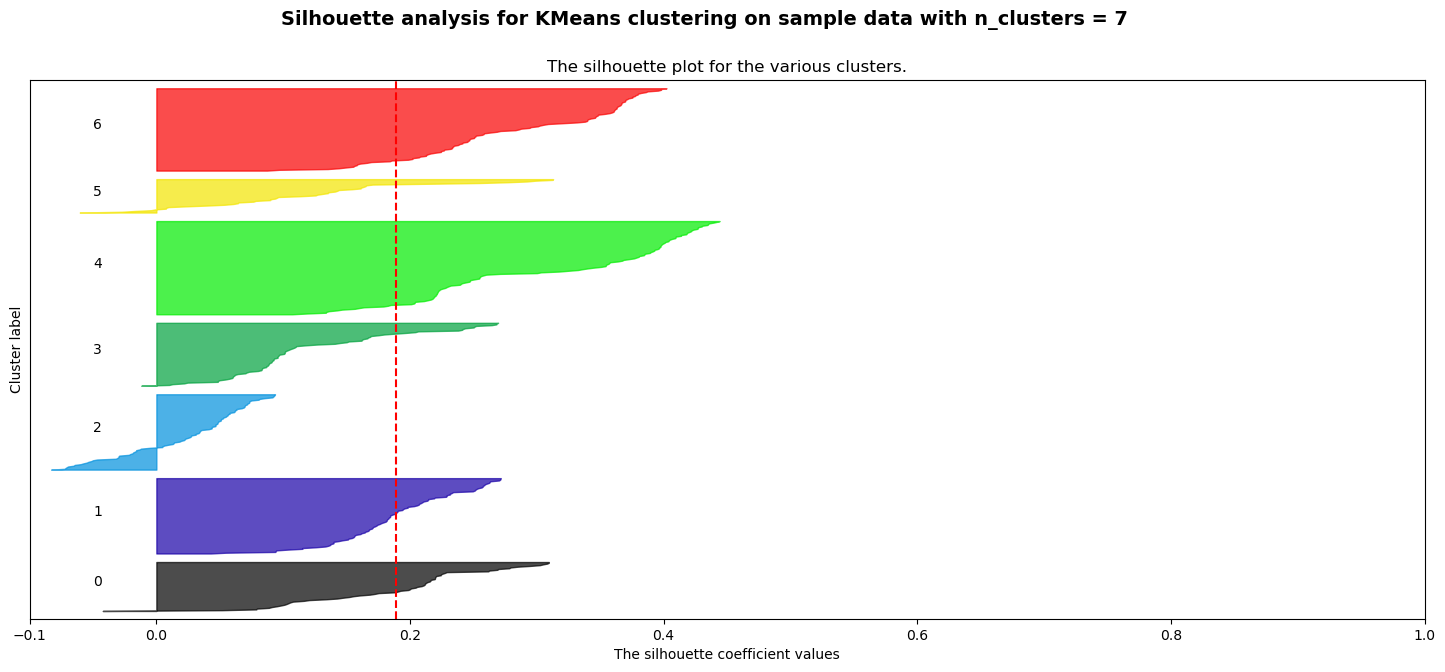

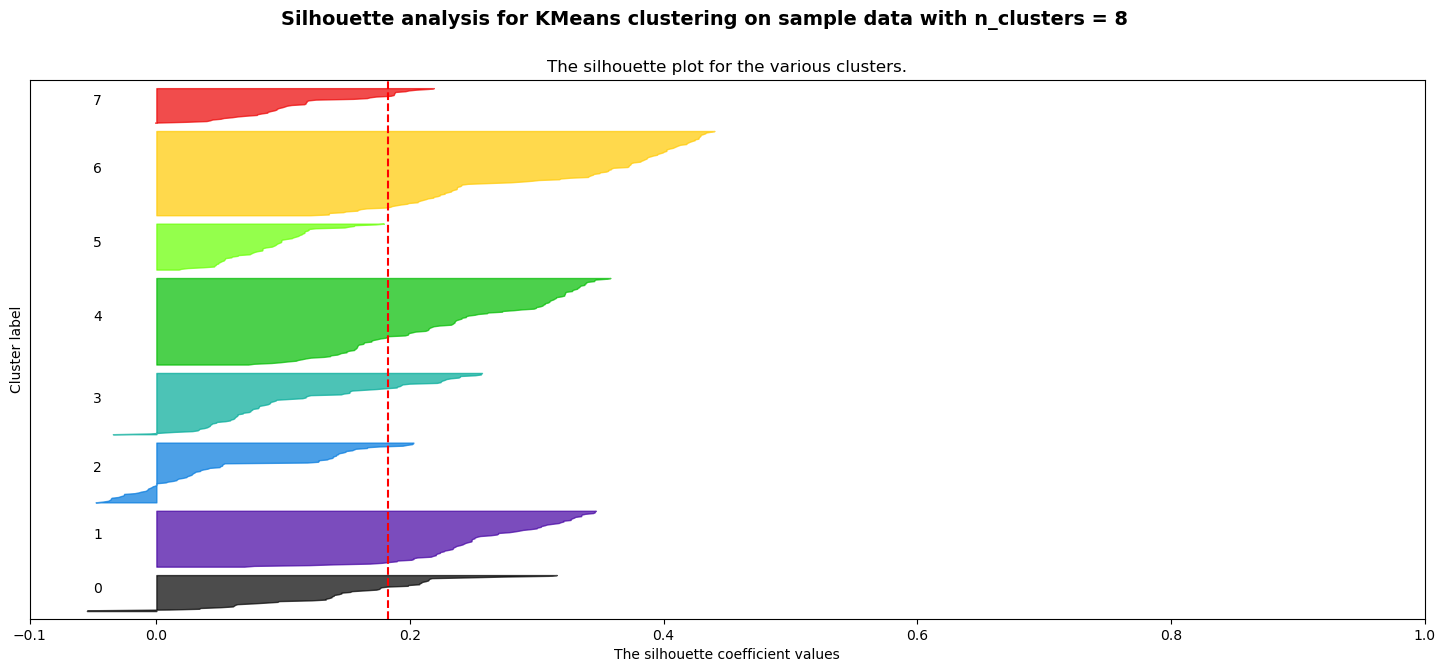

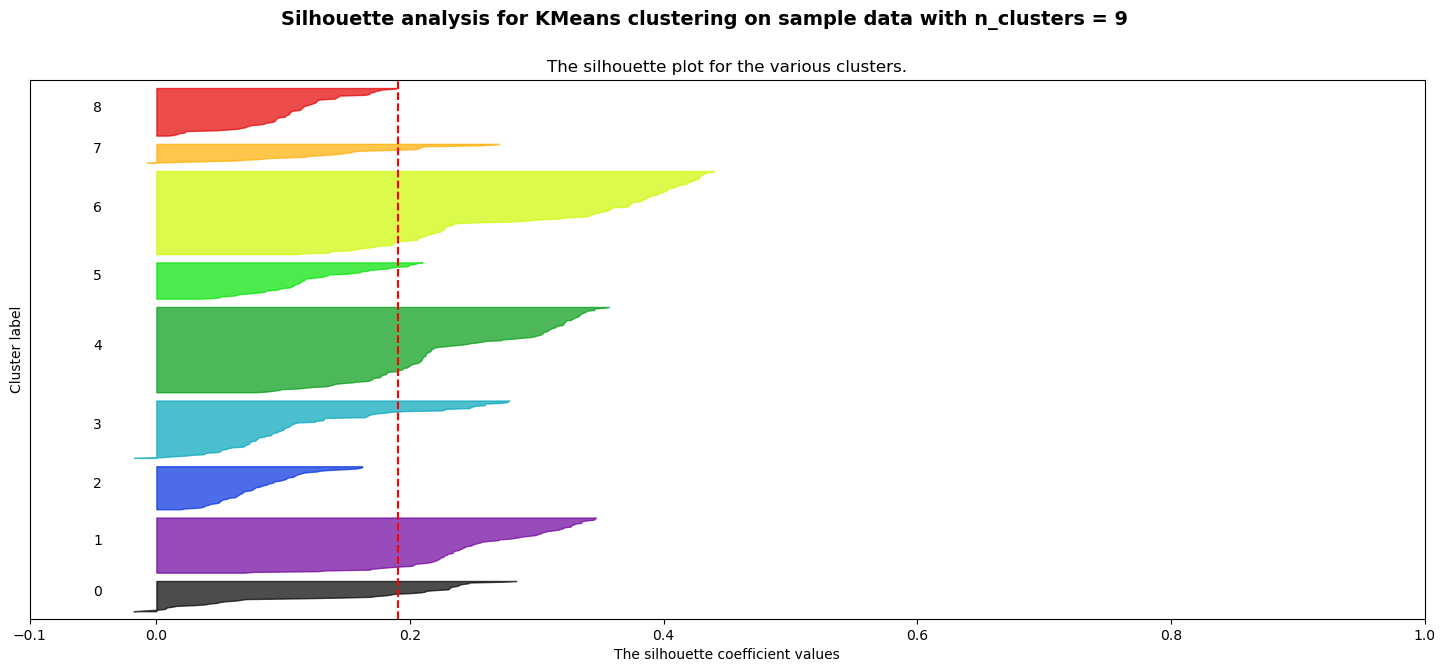

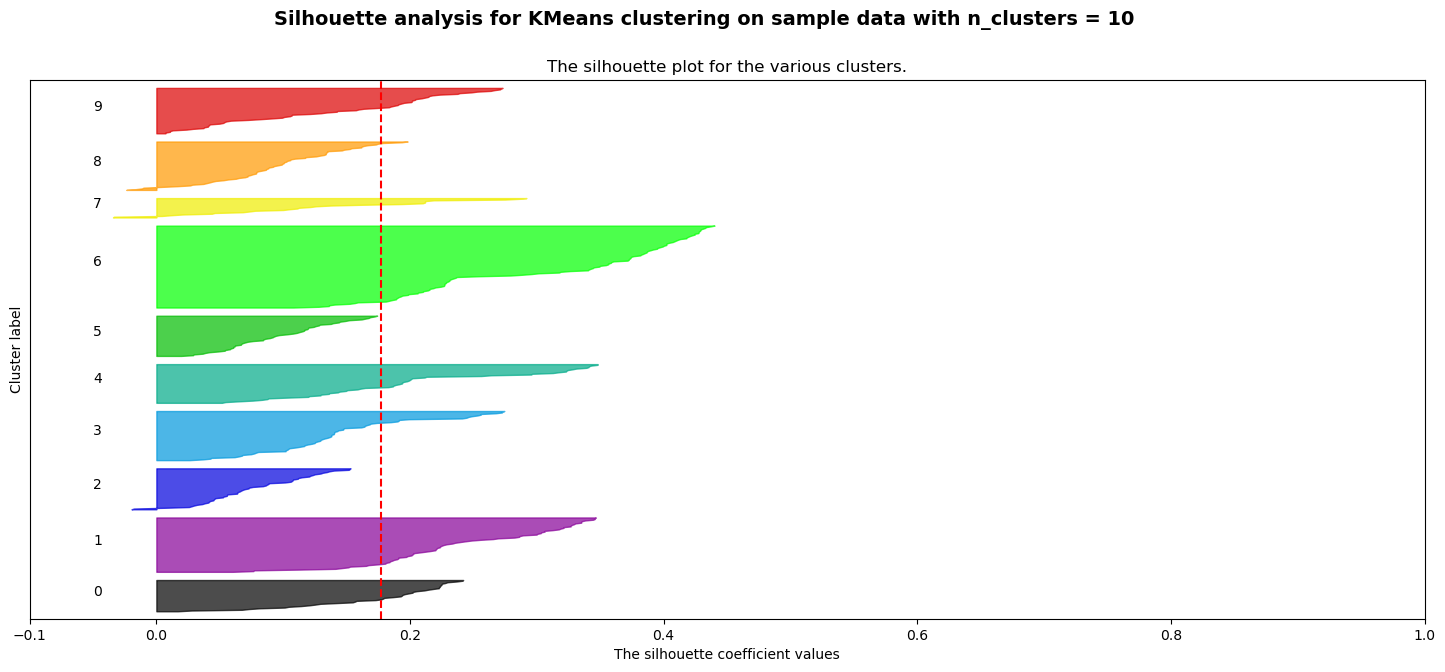

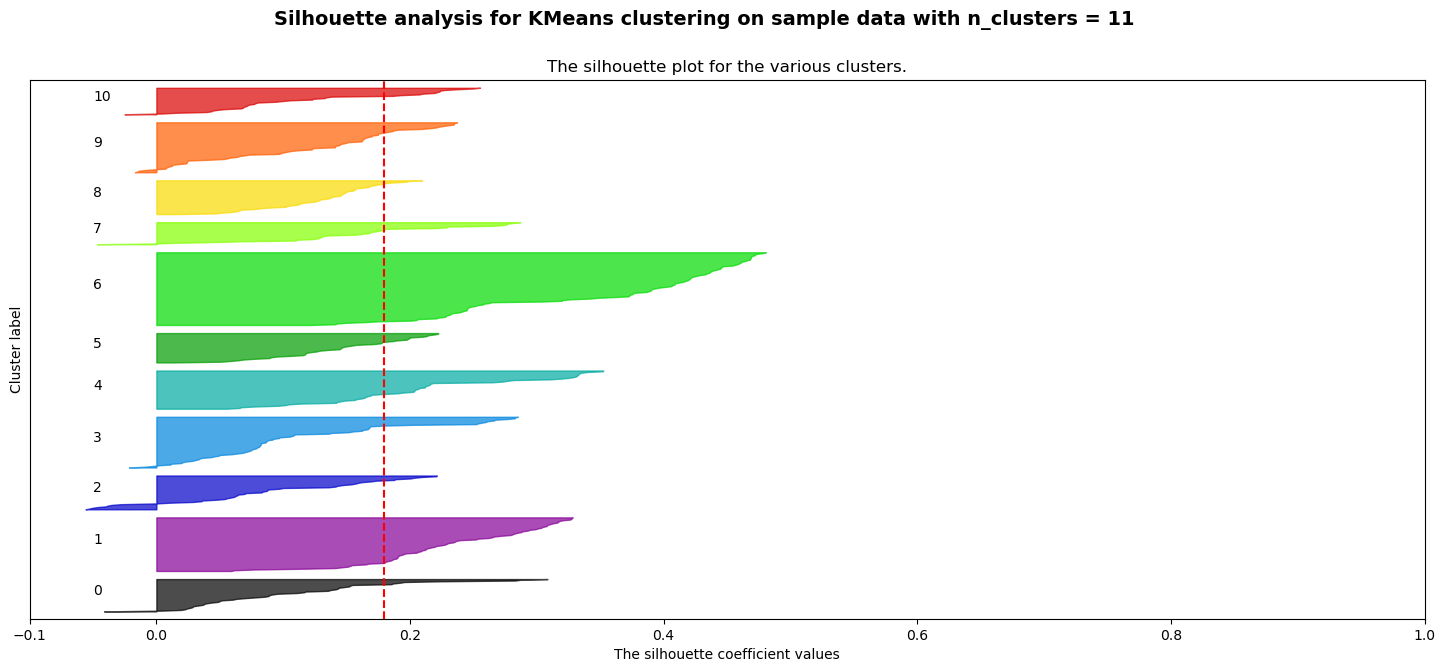

In [10]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
# Taken from SciKit Learn documentation

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Set up the range of cluster numbers to try
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the KMeans clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update the y_lower for next plot
        y_lower = y_upper + 10  # 10 for spacing

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")

plt.show()

In [12]:
silhouette_score(data, clustered_data_skibidi.labels_)

0.1678705530217804

Not great results, the silhouette score is low. This means that the clusters are not well-defined. 

# 8) Applying another Clustering algorithm

Task:  
Apply another clustering algorithm (from the ones available in scikit-learn, e.g. DBSCAN) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5) 
dbscan_labels = dbscan.fit_predict(data)

data_frame['dbscan_cluster'] = dbscan_labels

print(f"Unique clusters found by DBSCAN: {np.unique(dbscan_labels)}")


Unique clusters found by DBSCAN: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


We can see DBSCAN has found 14 (0 to 13) clusters and -1 representing noise. Let's plot it using TSNE and see what it shows us

C:\Users\kmila\AppData\Local\Temp\ipykernel_15740\116865744.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', n_clusters + 1)


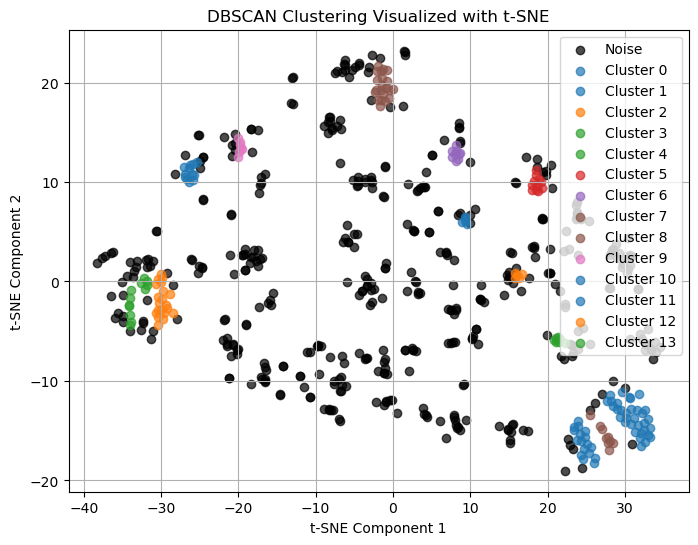

In [22]:
XYcoordinates_dbscan = manifold.TSNE(n_components=2, random_state=42).fit_transform(data)

plt.figure(figsize=(8,6))
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  

cmap = plt.cm.get_cmap('tab10', n_clusters + 1)

for i in np.unique(dbscan_labels):
    plt.scatter(XYcoordinates_dbscan[dbscan_labels == i, 0], 
                XYcoordinates_dbscan[dbscan_labels == i, 1], 
                label=f'Cluster {i}' if i != -1 else 'Noise', 
                alpha=0.7,
                color=cmap(i % 10) if i != -1 else 'black')

plt.title('DBSCAN Clustering Visualized with t-SNE')
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


Density-based spatial clustering of applications with noise (DBSCAN) with t-distributed stochastic neighbor embedding (TSNE) appears to highlight dense areas and classify the remainder as noise. Looking at these clusters it appears that different characteristics can move the points into a completely different region. The clusters however do appear to be linearly separable, meaning this could turn into a loan grant estimation. 

# 9) Conclusion

In [23]:
data_frame.groupby('dbscan_cluster').mean()


,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster,silhouette_cluster
dbscan_cluster,,,,,,,,,,,,,,,,,,,
-1,319.058296,0.295217,0.951301,1.091586,0.701513,0.800448,0.773543,0.029148,0.625561,0.006726,0.183857,0.071749,0.300448,0.338565,0.338565,0.569507,0.896698,1.908072,4.044843
0,105.166667,0.000000,0.861264,0.929750,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.708315,1.000000,4.000000
1,244.060606,0.000000,0.846280,1.154982,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.884453,0.000000,3.000000
2,288.000000,0.000000,0.714696,0.968063,0.725000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.715241,1.000000,2.000000
3,161.428571,0.000000,0.679782,1.032490,0.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.706935,0.000000,3.000000
4,99.800000,0.333333,0.702751,0.573182,0.700000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.569226,1.000000,2.000000
5,187.272727,0.000000,0.717479,0.895502,0.738636,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.623843,0.000000,7.000000
6,266.333333,0.000000,0.957930,1.103185,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.937708,3.000000,7.000000
7,379.095238,0.000000,0.768076,1.102675,0.744048,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.878819,4.000000,5.000000


Let's look at some horizontal features and then make some claims:
- -1 being noise, it has a lot of odd metrics such as it is the only cluster that has some self-employed, and not gradate and education not_graduate. 
- All clusters are not self-employed, all of them are graduates, have a credit history, and they all have a loan status yes.
- Cluster 0 have relatively high loan amount, and an evenly spread across loan amount term of `0.75`. They do have credit history, and unmarried. Their property area is urban, and they do have a Loan status.
- Cluster 1 have no dependants, mediocre application income, very high Loan Amount with the average loan amount term. They are working, married and not self-employed. They all live in semi-urban area.They have a high total income.
- Cluster 2 have no dependents, and lower application income compared to the first 2 clusters. This cluster has the second-highest loan amount, with a credit history. All male and married.
- Cluster 3, no dependants, all female married, working, graduates. They are on the lower end of the total income compared to the others.
- Cluster 4, They have 1 dependant, lower end of application income, the lowest loan amount. Lowest Loan amount term, all married male, and second-lowest application income.
- Cluster 5, no dependants, lower end of average application income, mediocre average loan amount, with below average loan term. All male and not married, working graduates.
- Cluster 6, No dependants, high average application income, high average loan amount with mode average of loan term. Unmarried, Male, working graduates. 
- Cluster 7, no dependants, lower end of application income, higher end of the loan amount and below mode loan amount term. All male, married, working graduates.
- Cluster 8, 1 dependant, high end of the application income, high average loan amount and above mode loan duration. Everyone is working graduate married males.
- Cluster 9, no dependants, lower end of the application income with lower end of loan amount, modal duration. Unmarried working graduate females.
- Cluster 10, 2 dependants, higher end of the application income, with higher end of the loan amount with below modal duration. Graduate working married males.
- Cluster 11, no dependants, above mean application income, yet just about on the higher end of the loan amount, with modal loan duration. Married working graduate males.
- Cluster 12, no dependants, lower end of application income, with lower end of loan amount and modal duration. Unmarried working graduate females.
- Cluster 13, 2 dependants, higher end of the income, with a high loan amount with modal duration. Married working graduate males.

A comment I can make from the current state of the table, is that applicants with higher income appear to receive a larger sum of loan amount. It also appears that female applicants all received smaller loan amount compared to the males who got given higher loans.

# 10) Testing with K=2

In [28]:
testing_k = 2

clustered_data_skibidi = cluster.KMeans(n_clusters=testing_k,
                                              n_init=10,
                                              max_iter=300).fit(data)
data_and_centres = np.r_[data, clustered_data_skibidi.cluster_centers_]

XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centres)
print("Transformation complete")


C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Transformation complete


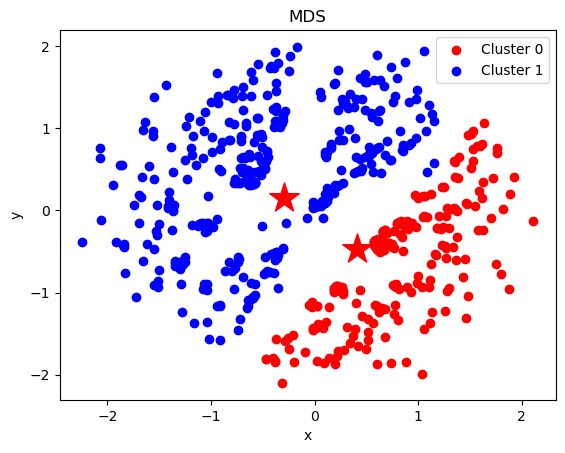

In [29]:
clustering_scatter_plot(
    points=XYcoordinates[:-testing_k, :],
    labels=clustered_data_skibidi.labels_,
    centres=XYcoordinates[-testing_k:, :],
    title='MDS'
)

This lines up more so with what we are trying to achieve. However, it is odd that the previous experiments don't prove this. 